In [1]:
import numpy as np
from numpy import linalg
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import math
import pandas as pd
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [2]:
# считаем узлы Чебышева

def calc_cheb_nodes(a, b, num_knot):
    k = (np.arange(num_knot) + 1 )[-1::-1]
    return (a+b)/2 + (b - a)/2 * np.cos((2*k - 1) /(2 * num_knot) * np.pi)

In [3]:
def calc_matrix(a,b,num_knot):
    
    knots = calc_cheb_nodes(a, b, num_knot) #считаем узлы Чебышева
    D = np.zeros((num_knot, num_knot))
    
    for k in range(1, num_knot - 1):
        D[k][k + 1] = 1 / (knots[k + 1] - knots[k - 1])
        D[k][k - 1] = -D[k][k + 1]
    
    D[0][1] = 1 / (knots[1] - knots[0])
    D[0][0] = -D[0][1]
    D[-1][-1] = 1/(knots[-1] - knots[-2])
    D[-1][-2] = -D[-1][-1]
    
    return D

В качестве тестовой функции возьмем $f(x) = \sin(x^2)$. 
Тогда производная $f'(x) = 2x\cos(x^2)$

In [7]:
import random
import matplotlib.pyplot as plt

err = []
a = random.randint(1, 10)
b = a + 10
f = lambda x: np.sin(x**2)
df = lambda x: 2*x*np.cos(x**2)
test_knots_arr = np.arange(10,10**3)

for num_knot in range(10,10**3):
    cur_knots = calc_cheb_nodes(a, b, num_knot)
    
    derivatives_value = calc_matrix(a, b, num_knot) @ np.array([f(d) for d in cur_knots])
    cur_err = np.array([df(d) for d in cur_knots]) - derivatives_value
    
    err.append(np.linalg.norm(cur_err, ord=np.inf))

In [8]:
err = np.log(np.array(err))

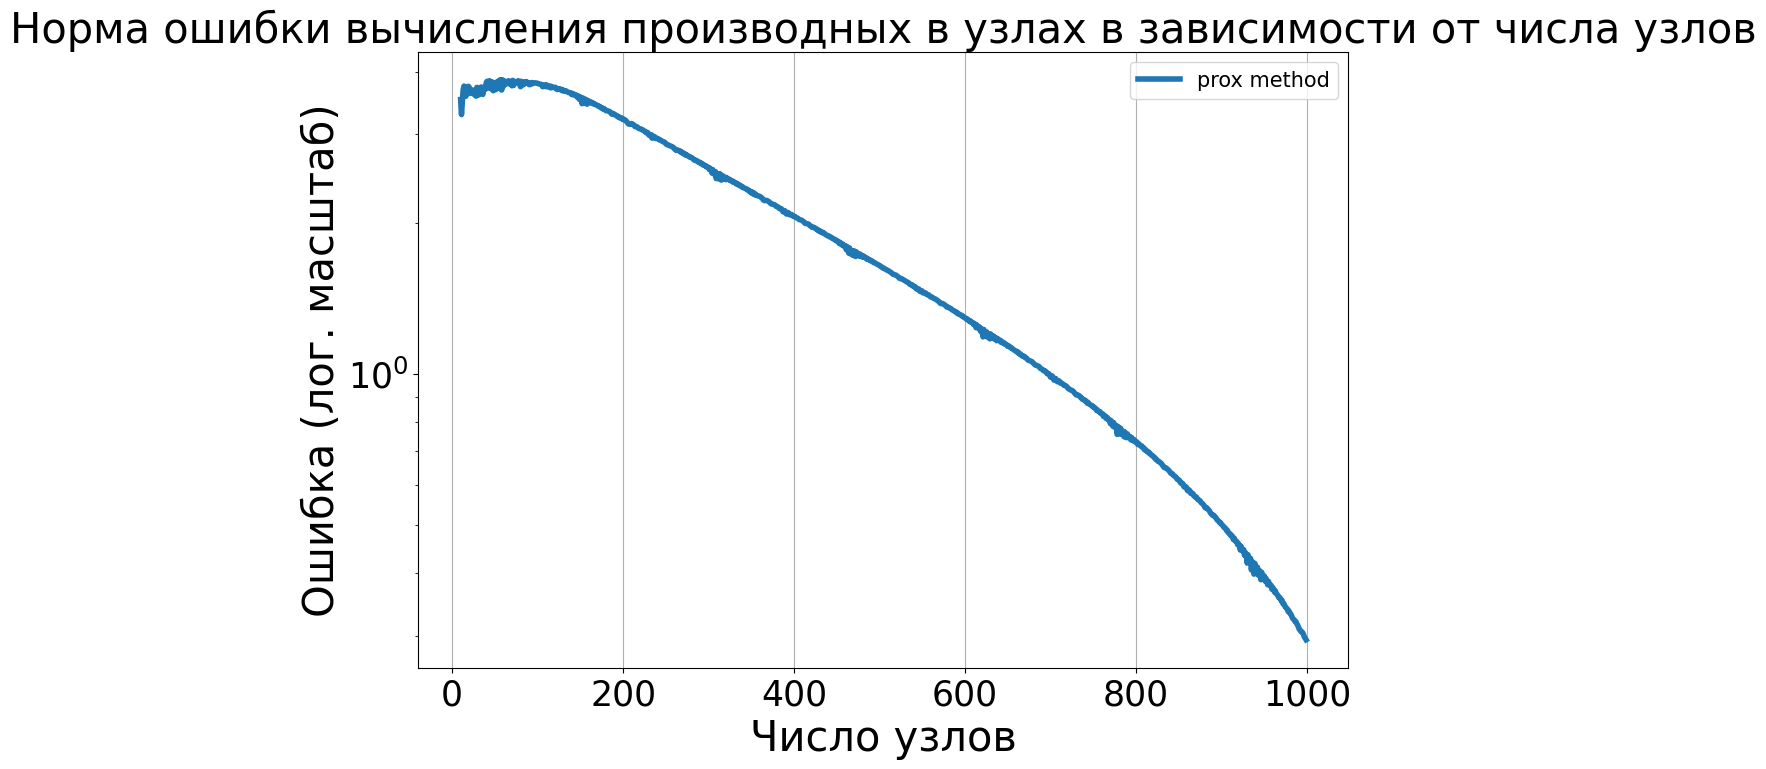

In [10]:
plt.figure(figsize=(12, 8))

plt.semilogy(test_knots_arr, err, linewidth=4, label = 'prox method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Число узлов", fontsize=30)
plt.ylabel("Ошибка (лог. масштаб)", fontsize=30)
plt.title(r"Норма ошибки вычисления производных в узлах в зависимости от числа узлов", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')